In [190]:
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
from dqltrainer import DQLagent
from dqlvaluetrainer import DQLValueAgent, ARagent

In [192]:
# import game,players,dominion,derivbot,combobot,cards,basic_ai,rl_agent

In [196]:
from game import *
from players import *
from dominion import *
from derivbot import *
from cards import *
from basic_ai import *
from rl_agent import *

## create a class object to do DQL

In [214]:
p1 = RandomPlayer()
p1.record_history = 1
p2 = RandomPlayer()
p2.record_history = 0
data = record_game(1, [p1,p2])
record_game(1,[p1, p2],'data/1game')

Playing game# 0
Took 0.065 seconds
{<Player: RandomPlayer>: 0, <Player: RandomPlayer>: 1}
{<Player: RandomPlayer>: 5.0, <Player: RandomPlayer>: 11.0}
Playing game# 0
Took 0.061 seconds
{<Player: RandomPlayer>: 0, <Player: RandomPlayer>: 1}
{<Player: RandomPlayer>: 3.0, <Player: RandomPlayer>: 8.0}


(array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 6, 8, ..., 0, 0, 0],
        ...,
        [0, 1, 8, ..., 0, 0, 2],
        [0, 1, 8, ..., 0, 0, 3],
        [0, 0, 8, ..., 0, 0, 3]]),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

In [7]:
data[0].shape

(4775, 111)

In [8]:
dql = ARagent(length=(data[0].shape[1]+data[1].shape[1]))
dql2 = ARagent(length=(data[0].shape[1]+data[1].shape[1]))

In [9]:
dql.fit(data)
dql2.fit(data)

In [83]:
dql.load_model('model/rl_iteration_342')
p1 = RLPlayer(lambda x: dql.model.predict(x))
p1.epsilon=0.0
p1.name = 'p1'

dql2.load_model('model/full_iteration_999')
p2 = RLPlayer(lambda x: dql2.model.predict(x))
p2.epsilon=0
p2.name = 'p2'
print(compare_bots([SmithyBot(),p1],num_games=10))
compare_bots([p1,p2],num_games=10)

Took 1.097 seconds
({<Player: SmithyBot(3, 6, 8)>: 8, <Player: p1>: 2}, {<Player: SmithyBot(3, 6, 8)>: 38.9, <Player: p1>: 28.8})
Took 1.283 seconds


({<Player: p1>: 3, <Player: p2>: 7}, {<Player: p1>: 34.5, <Player: p2>: 44.2})

In [207]:
from game import Game

In [225]:
p = SmithyBot()
pp = SmithyBot()
game = Game.setup([p, pp], variable_cards)
game.run()

[(<Player: SmithyBot(3, 6, 8)>, 45), (<Player: SmithyBot(3, 6, 8)>, 33)]

In [223]:
game.simulated

False

In [102]:
game = Game.setup([p, pp], variable_cards)
game.take_turn()

Game[<game.PlayerState object at 0x2acb7980c390>, <game.PlayerState object at 0x2acb7980c518>][1]

In [227]:
run([p2, p2])

[(<Player: RandomPlayer>, 22), (<Player: RandomPlayer>, 15)]

In [144]:
from sarsa_trainer import SarsaAgent

In [157]:
dql = SarsaAgent(length=(data[0].shape[1]+data[1].shape[1]))

In [158]:
dql.create_model_5layers()

In [156]:
data = load_game_data('data/1000with_action')

In [159]:
dql.add_data(data)
dql.do_train()

In [228]:
play_rlbot()

INFO:Game:
INFO:Game:Round 1 / player 2: You
INFO:Game:8 provinces left


(Estate, Estate, Copper, Copper, Copper)
Deck: 10 cards
VP: 3
BuyDecision (1 buys, 3 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
Your choice: 6


INFO:Game:You buys Silver
INFO:Game:
INFO:Game:Round 2 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer buys Smithy
INFO:Game:RLPlayer buys Smithy
INFO:Game:
INFO:Game:Round 2 / player 2: You
INFO:Game:8 provinces left


(Copper, Copper, Copper, Estate, Copper)
Deck: 11 cards
VP: 3
BuyDecision (1 buys, 4 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
Your choice: 10


INFO:Game:You buys Smithy
INFO:Game:
INFO:Game:Round 3 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer buys Silver
INFO:Game:RLPlayer buys Silver
INFO:Game:
INFO:Game:Round 3 / player 2: You
INFO:Game:8 provinces left


(Copper, Silver, Estate, Smithy, Estate)
Deck: 12 cards
VP: 3
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Smithy
Your choice: 1


INFO:Game:You plays Smithy


(Copper, Silver, Estate, Estate, Copper, Copper, Estate)
Deck: 12 cards
VP: 3
BuyDecision (1 buys, 5 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
Your choice: 15


INFO:Game:You buys Market
INFO:Game:
INFO:Game:Round 4 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Gold
INFO:Game:RLPlayer buys Gold
INFO:Game:
INFO:Game:Round 4 / player 2: You
INFO:Game:8 provinces left


(Copper, Copper, Copper, Copper, Estate)
Deck: 13 cards
VP: 3
BuyDecision (1 buys, 4 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
Your choice: 6


INFO:Game:You buys Silver
INFO:Game:
INFO:Game:Round 5 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer buys Silver
INFO:Game:RLPlayer buys Silver
INFO:Game:
INFO:Game:Round 5 / player 2: You
INFO:Game:8 provinces left


(Smithy, Market, Copper, Copper, Estate)
Deck: 14 cards
VP: 3
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Smithy
	[2] Market
Your choice: 2


INFO:Game:You plays Market


(Smithy, Copper, Copper, Estate, Estate)
Deck: 14 cards
VP: 3
ActDecision (1 actions, 2 buys, +1 coins)
	[0] None
	[1] Smithy
Your choice: 1


INFO:Game:You plays Smithy


(Copper, Copper, Estate, Estate, Copper, Silver, Estate)
Deck: 14 cards
VP: 3
BuyDecision (2 buys, 6 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
Your choice: 16


INFO:Game:You buys Gold


(Copper, Copper, Estate, Estate, Copper, Silver, Estate)
Deck: 15 cards
VP: 3
BuyDecision (1 buys, 0 coins)
	[0] None
	[1] Copper
Your choice: 0


INFO:Game:You buys None
INFO:Game:
INFO:Game:Round 6 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer buys Gold
INFO:Game:RLPlayer buys Gold
INFO:Game:
INFO:Game:Round 6 / player 2: You
INFO:Game:8 provinces left


(Copper, Copper, Copper, Copper, Silver)
Deck: 15 cards
VP: 3
BuyDecision (1 buys, 6 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
Your choice: 16


INFO:Game:You buys Gold
INFO:Game:
INFO:Game:Round 7 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Smithy
INFO:Game:RLPlayer buys Smithy
INFO:Game:
INFO:Game:Round 7 / player 2: You
INFO:Game:8 provinces left


(Copper, Copper, Gold, Market, Estate)
Deck: 16 cards
VP: 3
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Market
Your choice: 1


INFO:Game:You plays Market


(Copper, Copper, Gold, Estate, Copper)
Deck: 16 cards
VP: 3
BuyDecision (2 buys, 7 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
Your choice: 16


INFO:Game:You buys Gold


(Copper, Copper, Gold, Estate, Copper)
Deck: 17 cards
VP: 3
BuyDecision (1 buys, 1 coins)
	[0] None
	[1] Copper
Your choice: 0


INFO:Game:You buys None
INFO:Game:
INFO:Game:Round 8 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer buys Gold
INFO:Game:RLPlayer buys Gold
INFO:Game:
INFO:Game:Round 8 / player 2: You
INFO:Game:8 provinces left


(Silver, Copper, Smithy, Copper, Silver)
Deck: 17 cards
VP: 3
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Smithy
Your choice: 1


INFO:Game:You plays Smithy


(Silver, Copper, Copper, Silver, Gold, Estate, Copper)
Deck: 17 cards
VP: 3
BuyDecision (1 buys, 10 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
	[17] Province
Your choice: 17


INFO:Game:You buys Province
INFO:Game:
INFO:Game:Round 9 / player 1: RLPlayer
INFO:Game:7 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Gold
INFO:Game:RLPlayer buys Gold
INFO:Game:
INFO:Game:Round 9 / player 2: You
INFO:Game:7 provinces left


(Copper, Estate, Copper, Estate, Copper)
Deck: 18 cards
VP: 9
BuyDecision (1 buys, 3 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
Your choice: 8


INFO:Game:You buys Warehouse
INFO:Game:
INFO:Game:Round 10 / player 1: RLPlayer
INFO:Game:7 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Gold
INFO:Game:RLPlayer buys Gold
INFO:Game:
INFO:Game:Round 10 / player 2: You
INFO:Game:7 provinces left


(Gold, Gold, Smithy, Copper, Copper)
Deck: 19 cards
VP: 9
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Smithy
Your choice: 1


INFO:Game:You plays Smithy


(Gold, Gold, Copper, Copper, Province, Silver, Copper)
Deck: 19 cards
VP: 9
BuyDecision (1 buys, 11 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
	[17] Province
Your choice: 17


INFO:Game:You buys Province
INFO:Game:
INFO:Game:Round 11 / player 1: RLPlayer
INFO:Game:6 provinces left
INFO:Game:RLPlayer buys Province
INFO:Game:RLPlayer buys Province
INFO:Game:
INFO:Game:Round 11 / player 2: You
INFO:Game:5 provinces left


(Gold, Copper, Silver, Market, Estate)
Deck: 20 cards
VP: 15
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Market
Your choice: 1


INFO:Game:You plays Market


(Gold, Copper, Silver, Estate, Smithy)
Deck: 20 cards
VP: 15
ActDecision (1 actions, 2 buys, +1 coins)
	[0] None
	[1] Smithy
Your choice: 1


INFO:Game:You plays Smithy


(Gold, Copper, Silver, Estate, Copper, Estate, Copper)
Deck: 20 cards
VP: 15
BuyDecision (2 buys, 9 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
	[17] Province
Your choice: 17


INFO:Game:You buys Province


(Gold, Copper, Silver, Estate, Copper, Estate, Copper)
Deck: 21 cards
VP: 21
BuyDecision (1 buys, 1 coins)
	[0] None
	[1] Copper
Your choice: 0


INFO:Game:You buys None
INFO:Game:
INFO:Game:Round 12 / player 1: RLPlayer
INFO:Game:4 provinces left
INFO:Game:RLPlayer buys Duchy
INFO:Game:RLPlayer buys Duchy
INFO:Game:
INFO:Game:Round 12 / player 2: You
INFO:Game:4 provinces left


(Province, Province, Copper, Warehouse, Copper)
Deck: 21 cards
VP: 21
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Warehouse
Your choice: 1


INFO:Game:You plays Warehouse


(Province, Province, Copper, Copper, Estate, Gold, Gold)
Deck: 21 cards
VP: 21
DiscardDecision(Province, Province, Copper, Copper, Estate, Gold, Gold)
	[0] Copper
	[1] Copper
	[2] Estate
	[3] Gold
	[4] Gold
	[5] Province
	[6] Province
Choose at least 3 options.
Choose at most 3 options.
Your choices (separated by commas): 2,5,6


INFO:Game:You discards [Estate, Province, Province]


(Copper, Copper, Gold, Gold)
Deck: 21 cards
VP: 21
BuyDecision (1 buys, 8 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
	[17] Province
Your choice: 17


INFO:Game:You buys Province
INFO:Game:
INFO:Game:Round 13 / player 1: RLPlayer
INFO:Game:3 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Province
INFO:Game:RLPlayer buys Province
INFO:Game:
INFO:Game:Round 13 / player 2: You
INFO:Game:2 provinces left


(Copper, Silver, Copper, Copper, Copper)
Deck: 22 cards
VP: 27
BuyDecision (1 buys, 6 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
Your choice: 12


INFO:Game:You buys Duchy
INFO:Game:
INFO:Game:Round 14 / player 1: RLPlayer
INFO:Game:2 provinces left
INFO:Game:RLPlayer buys Duchy
INFO:Game:RLPlayer buys Duchy
INFO:Game:
INFO:Game:Round 14 / player 2: You
INFO:Game:2 provinces left


(Estate, Province, Estate, Gold, Warehouse)
Deck: 23 cards
VP: 30
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Warehouse
Your choice: 1


INFO:Game:You plays Warehouse


(Estate, Province, Estate, Gold, Silver, Market, Province)
Deck: 23 cards
VP: 30
DiscardDecision(Estate, Province, Estate, Gold, Silver, Market, Province)
	[0] Estate
	[1] Estate
	[2] Silver
	[3] Market
	[4] Gold
	[5] Province
	[6] Province
Choose at least 3 options.
Choose at most 3 options.
Your choices (separated by commas): 0,1,5


INFO:Game:You discards [Estate, Estate, Province]


(Gold, Silver, Market, Province)
Deck: 23 cards
VP: 30
ActDecision (1 actions, 1 buys, +0 coins)
	[0] None
	[1] Market
Your choice: 1


INFO:Game:You plays Market


(Gold, Silver, Province, Smithy)
Deck: 23 cards
VP: 30
ActDecision (1 actions, 2 buys, +1 coins)
	[0] None
	[1] Smithy
Your choice: 1


INFO:Game:You plays Smithy


(Gold, Silver, Province, Estate, Copper, Gold)
Deck: 23 cards
VP: 30
BuyDecision (2 buys, 10 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
	[6] Silver
	[7] Village
	[8] Warehouse
	[9] Militia
	[10] Smithy
	[11] Council Room
	[12] Duchy
	[13] Festival
	[14] Laboratory
	[15] Market
	[16] Gold
	[17] Province
Your choice: 17


INFO:Game:You buys Province


(Gold, Silver, Province, Estate, Copper, Gold)
Deck: 24 cards
VP: 36
BuyDecision (1 buys, 2 coins)
	[0] None
	[1] Copper
	[2] Cellar
	[3] Chapel
	[4] Estate
	[5] Moat
Your choice: 4


INFO:Game:You buys Estate
INFO:Game:
INFO:Game:Round 15 / player 1: RLPlayer
INFO:Game:1 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Province
INFO:Game:RLPlayer buys Province


[(<Player: RLPlayer>, 27), (<Player: You>, 37)]

In [201]:
data = dql.generate_data(1)

INFO:Game:
INFO:Game:Round 1 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer buys Silver
INFO:Game:RLPlayer buys Silver
INFO:Game:
INFO:Game:Round 1 / player 2: RandomPlayer
INFO:Game:8 provinces left
INFO:Game:RandomPlayer buys Silver
INFO:Game:RandomPlayer buys Silver
INFO:Game:
INFO:Game:Round 2 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer buys Smithy
INFO:Game:RLPlayer buys Smithy
INFO:Game:
INFO:Game:Round 2 / player 2: RandomPlayer
INFO:Game:8 provinces left
INFO:Game:RandomPlayer buys Moat
INFO:Game:RandomPlayer buys Moat
INFO:Game:
INFO:Game:Round 3 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Gold
INFO:Game:RLPlayer buys Gold
INFO:Game:
INFO:Game:Round 3 / player 2: RandomPlayer
INFO:Game:8 provinces left
INFO:Game:RandomPlayer buys Chapel
INFO:Game:RandomPlayer buys Chapel
INFO:Game:
INFO:Game:Round 4 / player 1: RLPlayer
INFO:Game:8 provinces left
INFO:Game:RLPlayer plays Smit

INFO:Game:2 provinces left
INFO:Game:RLPlayer plays Laboratory


Playing game# 0


INFO:Game:RLPlayer buys Copper
INFO:Game:RLPlayer buys Copper
INFO:Game:
INFO:Game:Round 22 / player 2: RandomPlayer
INFO:Game:2 provinces left
INFO:Game:RandomPlayer plays Moat
INFO:Game:RandomPlayer buys None
INFO:Game:RandomPlayer buys None
INFO:Game:
INFO:Game:Round 23 / player 1: RLPlayer
INFO:Game:2 provinces left
INFO:Game:RLPlayer buys Duchy
INFO:Game:RLPlayer buys Duchy
INFO:Game:
INFO:Game:Round 23 / player 2: RandomPlayer
INFO:Game:2 provinces left
INFO:Game:RandomPlayer plays Cellar
INFO:Game:RandomPlayer discards [Moat, Estate, Copper]
INFO:Game:RandomPlayer plays Moat
INFO:Game:RandomPlayer buys Silver
INFO:Game:RandomPlayer buys Silver
INFO:Game:
INFO:Game:Round 24 / player 1: RLPlayer
INFO:Game:2 provinces left
INFO:Game:RLPlayer plays Smithy
INFO:Game:RLPlayer buys Province
INFO:Game:RLPlayer buys Province
INFO:Game:
INFO:Game:Round 24 / player 2: RandomPlayer
INFO:Game:1 provinces left
INFO:Game:RandomPlayer plays Moat
INFO:Game:RandomPlayer buys Moat
INFO:Game:Random

Took 0.261 seconds
{<Player: RLPlayer>: 1, <Player: RandomPlayer>: 0}
{<Player: RLPlayer>: 70.0, <Player: RandomPlayer>: 3.0}


In [185]:
dql.load_model('model/rand_v0_iteration_485')
p = SmithyBot()
p2 = RLPlayer(lambda x: dql.model.predict(x))
p2.epsilon = 0
game = Game.setup([p, p2], variable_cards)
game.run()

INFO:Game:
INFO:Game:Round 1 / player 1: RLPlayer
INFO:Game:8 provinces left
DEBUG:RLPlayer:Decision: BuyDecision (1 buys, 3 coins)
INFO:Game:RLPlayer buys Silver
INFO:Game:RLPlayer buys Silver
INFO:Game:
INFO:Game:Round 1 / player 2: SmithyBot(3, 6, 8)
INFO:Game:8 provinces left
INFO:Game:SmithyBot(3, 6, 8) buys Silver
INFO:Game:SmithyBot(3, 6, 8) buys Silver
INFO:Game:
INFO:Game:Round 2 / player 1: RLPlayer
INFO:Game:8 provinces left
DEBUG:RLPlayer:Decision: BuyDecision (1 buys, 4 coins)
INFO:Game:RLPlayer buys Smithy
INFO:Game:RLPlayer buys Smithy
INFO:Game:
INFO:Game:Round 2 / player 2: SmithyBot(3, 6, 8)
INFO:Game:8 provinces left
INFO:Game:SmithyBot(3, 6, 8) buys Smithy
INFO:Game:SmithyBot(3, 6, 8) buys Smithy
INFO:Game:
INFO:Game:Round 3 / player 1: RLPlayer
INFO:Game:8 provinces left
DEBUG:RLPlayer:Decision: BuyDecision (1 buys, 3 coins)
INFO:Game:RLPlayer buys Silver
INFO:Game:RLPlayer buys Silver
INFO:Game:
INFO:Game:Round 3 / player 2: SmithyBot(3, 6, 8)
INFO:Game:8 province

[(<Player: RLPlayer>, 39), (<Player: SmithyBot(3, 6, 8)>, 33)]

In [ ]:
dql.load_model('model/rand_v0_iteration_485')
play_rlbot(lambda x: dql.model.predict(x))

In [9]:
dql.load_model('model/smithy_iteration_999')
p1 = RLPlayer(lambda x: dql.model.predict(x))
p1.epsilon=0.0
p1.name = 'p1'

dql2.load_model('model/v0_iteration_999')
p2 = RLPlayer(lambda x: dql2.model.predict(x))
p2.epsilon=0
p2.name = 'p2'
compare_bots([p1,p2],num_games=100)

Took 4.854 seconds


({<Player: p1>: 34, <Player: p2>: 66},
 {<Player: p1>: 36.74, <Player: p2>: 42.04})

In [10]:
p1 = SmithyBot()
wlist = []
rl = []
rand = []
for i in range(1,999,5):
    print(i)
    dql.load_model('model/v0_iteration_{:03d}'.format(i))
    dql.epsilon = 0
    p2 = RLPlayer(lambda x: dql.model.predict(x))
    p2.include_action=1
    p2.epsilon = 0
    wins, fs = compare_bots([p1,p2],num_games=20)
    wlist.append(wins[p2])
    rl.append(fs[p2])
    rand.append(fs[p1])
np.save('data/random_trained_winrate', np.array(wlist))
np.save('data/random_trained_rl', np.array(rl))
np.save('data/random_trained_smith', np.array(rand))

1
Took 0.592 seconds
6
Took 0.613 seconds
11
Took 0.729 seconds
16
Took 0.714 seconds
21
Took 0.614 seconds
26
Took 0.722 seconds
31
Took 0.659 seconds
36
Took 0.592 seconds
41
Took 0.711 seconds
46
Took 0.688 seconds
51
Took 0.648 seconds
56
Took 0.702 seconds
61
Took 0.984 seconds
66
Took 0.514 seconds
71
Took 0.485 seconds
76
Took 0.500 seconds
81
Took 0.560 seconds
86
Took 0.503 seconds
91
Took 0.507 seconds
96
Took 0.492 seconds
101
Took 0.509 seconds
106
Took 0.513 seconds
111
Took 0.500 seconds
116
Took 0.463 seconds
121
Took 0.597 seconds
126
Took 0.552 seconds
131
Took 0.554 seconds
136
Took 0.745 seconds
141
Took 0.570 seconds
146
Took 0.592 seconds
151
Took 0.628 seconds
156
Took 0.529 seconds
161
Took 0.594 seconds
166
Took 0.721 seconds
171
Took 0.552 seconds
176
Took 0.601 seconds
181
Took 0.642 seconds
186
Took 0.725 seconds
191
Took 0.596 seconds
196
Took 0.684 seconds
201
Took 0.647 seconds
206
Took 0.691 seconds
211
Took 0.585 seconds
216
Took 0.617 seconds
221
Took 0

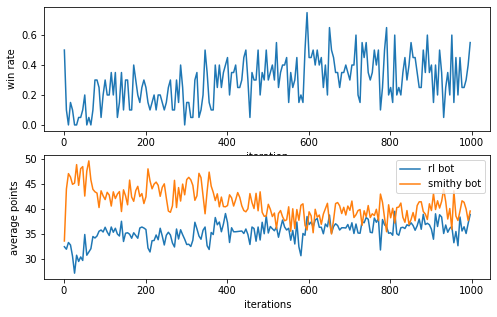

In [7]:
wlist = np.load('data/random_trained_winrate.npy')
rl = np.load('data/random_trained_rl.npy')
smith = np.load('data/random_trained_smith.npy')
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.plot(np.arange(1,999,5),np.array(wlist)/20, label='win rate')
plt.xlabel('iteration')
plt.ylabel('win rate')
plt.subplot(2,1,2)
plt.plot(np.arange(1,999,5),rl, label='rl bot')
plt.plot(np.arange(1,999,5),smith, label='smithy bot')
plt.xlabel('iterations')
plt.ylabel('average points')
plt.legend()

In [12]:
p1 = SmithyBot()
wlist = []
rl = []
rand = []
for i in range(1,999,5):
    print(i)
    dql.load_model('model/smithy_iteration_{:03d}'.format(i))
    dql.epsilon = 0
    p2 = RLPlayer(lambda x: dql.model.predict(x))
    p2.include_action=1
    p2.epsilon = 0
    wins, fs = compare_bots([p1,p2],num_games=20)
    wlist.append(wins[p2])
    rl.append(fs[p2])
    rand.append(fs[p1])
np.save('data/smithy_trained_winrate', np.array(wlist))
np.save('data/smithy_trained_rl', np.array(rl))
np.save('data/smithy_trained_smith', np.array(rand))

1
Took 0.811 seconds
6
Took 0.769 seconds
11
Took 0.781 seconds
16
Took 0.489 seconds
21
Took 0.700 seconds
26
Took 0.733 seconds
31
Took 0.512 seconds
36
Took 0.596 seconds
41
Took 0.670 seconds
46
Took 0.552 seconds
51
Took 0.549 seconds
56
Took 0.729 seconds
61
Took 0.561 seconds
66
Took 0.606 seconds
71
Took 0.518 seconds
76
Took 0.771 seconds
81
Took 0.670 seconds
86
Took 0.618 seconds
91
Took 0.691 seconds
96
Took 0.631 seconds
101
Took 0.647 seconds
106
Took 0.693 seconds
111
Took 0.601 seconds
116
Took 0.627 seconds
121
Took 0.708 seconds
126
Took 0.584 seconds
131
Took 0.558 seconds
136
Took 0.648 seconds
141
Took 0.640 seconds
146
Took 0.474 seconds
151
Took 0.627 seconds
156
Took 0.562 seconds
161
Took 0.509 seconds
166
Took 0.530 seconds
171
Took 0.534 seconds
176
Took 0.545 seconds
181
Took 0.493 seconds
186
Took 0.501 seconds
191
Took 0.480 seconds
196
Took 0.458 seconds
201
Took 0.445 seconds
206
Took 0.569 seconds
211
Took 0.478 seconds
216
Took 0.461 seconds
221
Took 0

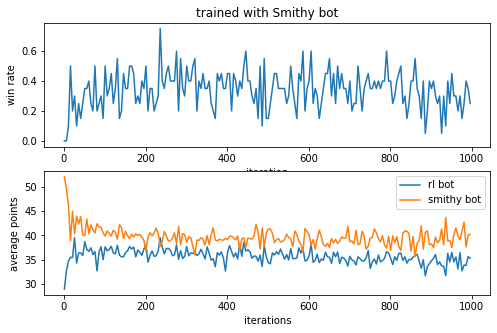

In [16]:
wlist = np.load('data/smithy_trained_winrate.npy')
rl = np.load('data/smithy_trained_rl.npy')
smith = np.load('data/smithy_trained_smith.npy')
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.title('trained with Smithy bot')
plt.plot(np.arange(1,999,5),np.array(wlist)/20, label='win rate')
plt.xlabel('iteration')
plt.ylabel('win rate')
plt.subplot(2,1,2)
plt.plot(np.arange(1,999,5),rl, label='rl bot')
plt.plot(np.arange(1,999,5),smith, label='smithy bot')
plt.xlabel('iterations')
plt.ylabel('average points')
plt.legend()


Playing game# 0
Took 0.038 seconds
{<Player: RandomPlayer>: 1, <Player: RandomPlayer>: 0}
{<Player: RandomPlayer>: 43.0, <Player: RandomPlayer>: 19.0}


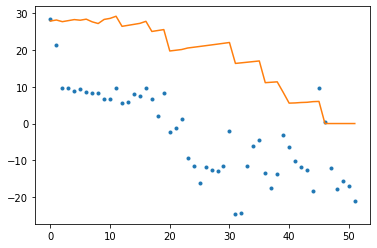

In [363]:
p1 = RandomPlayer()
p1.record_history = 1
p2 = RandomPlayer()
p2.record_history = 0
data = record_game(1, [p1,p2])
plt.plot(dql.model.predict(np.concatenate([data[0], data[1]], axis=1)),'.')
plt.plot(data[4])

In [286]:
dql.generate_data_smithy(100);

Playing game# 0
Took 3.272 seconds
{<Player: RLPlayer>: 0, <Player: SmithyBot(3, 6, 8)>: 100}
{<Player: RLPlayer>: 28.8, <Player: SmithyBot(3, 6, 8)>: 55.39}


In [65]:
dql.load_model('model/v1_iteration_086')
dql.epsilon = 0
dql.generate_data_smithy(50);
dql.generate_data(50);

Playing game# 0
Took 2.030 seconds
{<Player: RLPlayer>: 1, <Player: SmithyBot(3, 6, 8)>: 49}
{<Player: RLPlayer>: 24.18, <Player: SmithyBot(3, 6, 8)>: 53.32}
Playing game# 0
Took 5.344 seconds
{<Player: RLPlayer>: 48, <Player: RandomPlayer>: 2}
{<Player: RLPlayer>: 49.18, <Player: RandomPlayer>: 20.38}


In [71]:
dql.load_model('model/v1_iteration_095')
dql.epsilon = 0
dql.generate_data_smithy(50);
dql.generate_data(50);

Playing game# 0
Took 2.154 seconds
{<Player: RLPlayer>: 0, <Player: SmithyBot(3, 6, 8)>: 50}
{<Player: RLPlayer>: 29.06, <Player: SmithyBot(3, 6, 8)>: 53.82}
Playing game# 0
Took 3.863 seconds
{<Player: RLPlayer>: 49, <Player: RandomPlayer>: 1}
{<Player: RLPlayer>: 38.66, <Player: RandomPlayer>: 16.62}


In [109]:
p1 = RandomPlayer()
wlist = []
rl = []
rand = []
for i in range(1,230):
    print(i)
    dql.load_model('model/v1_iteration_{:03d}'.format(i))
    dql.epsilon = 0
    p2 = RLPlayer(lambda x: dql.model_predict.predict(x))
    p2.include_action=0
    p2.epsilon = 0
    wins, fs = compare_bots([p1,p2],num_games=20)
    wlist.append(wins[p2])
    rl.append(fs[p2])
    rand.append(fs[p1])

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145])

In [121]:
p1 = RandomPlayer()
wlist = []
rl = []
rand = []
for i in range(1,230):
    print(i)
    dql.load_model('model/v1_iteration_{:03d}'.format(i))
    dql.epsilon = 0
    p2 = RLPlayer(lambda x: dql.model_predict.predict(x))
    p2.include_action=0
    p2.epsilon = 0
    wins, fs = compare_bots([p1,p2],num_games=20)
    wlist.append(wins[p2])
    rl.append(fs[p2])
    rand.append(fs[p1])

1
Took 3.553 seconds
2
Took 3.471 seconds
3
Took 3.296 seconds
4
Took 3.306 seconds
5
Took 3.361 seconds
6
Took 3.261 seconds
7
Took 3.990 seconds
8
Took 4.153 seconds
9
Took 4.215 seconds
10
Took 4.707 seconds
11
Took 5.229 seconds
12
Took 5.568 seconds
13
Took 5.164 seconds
14
Took 5.344 seconds
15
Took 5.374 seconds
16
Took 4.800 seconds
17
Took 5.338 seconds
18
Took 5.062 seconds
19
Took 4.084 seconds
20
Took 2.631 seconds
21
Took 2.165 seconds
22
Took 1.949 seconds
23
Took 1.666 seconds
24
Took 2.002 seconds
25
Took 1.569 seconds
26
Took 1.420 seconds
27
Took 1.485 seconds
28
Took 1.618 seconds
29
Took 1.389 seconds
30
Took 1.341 seconds
31
Took 1.668 seconds
32
Took 1.691 seconds
33
Took 2.130 seconds
34
Took 1.964 seconds
35
Took 2.214 seconds
36
Took 1.878 seconds
37
Took 2.155 seconds
38
Took 2.023 seconds
39
Took 2.280 seconds
40
Took 1.928 seconds
41
Took 2.132 seconds
42
Took 1.999 seconds
43
Took 1.535 seconds
44
Took 1.607 seconds
45
Took 2.074 seconds
46
Took 1.817 secon

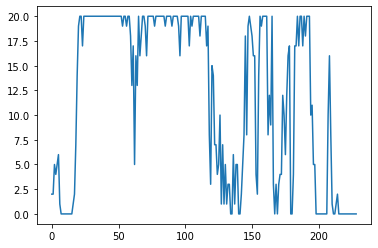

In [122]:
plt.plot(np.array(wlist))

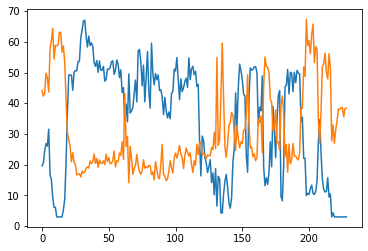

In [123]:
plt.plot(rl)
plt.plot(rand)

In [124]:
p1 = SmithyBot()
wlist = []
rl = []
smith = []
for i in range(1,230):
    print(i)
    dql.load_model('model/v1_iteration_{:03d}'.format(i))
    dql.epsilon = 0
    p2 = RLPlayer(lambda x: dql.model_predict.predict(x))
    p2.include_action=0
    p2.epsilon = 0
    wins, fs = compare_bots([p1,p2],num_games=10)
    wlist.append(wins[p2])
    rl.append(fs[p2])
    smith.append(fs[p1])

1
Took 0.421 seconds
2
Took 0.442 seconds
3
Took 0.457 seconds
4
Took 0.901 seconds
5
Took 0.441 seconds
6
Took 0.430 seconds
7
Took 0.425 seconds
8
Took 0.438 seconds
9
Took 0.440 seconds
10
Took 0.469 seconds
11
Took 0.439 seconds
12
Took 0.418 seconds
13
Took 0.430 seconds
14
Took 0.469 seconds
15
Took 0.443 seconds
16
Took 0.472 seconds
17
Took 0.448 seconds
18
Took 0.407 seconds
19
Took 0.407 seconds
20
Took 0.435 seconds
21
Took 0.449 seconds
22
Took 0.429 seconds
23
Took 0.433 seconds
24
Took 0.327 seconds
25
Took 0.349 seconds
26
Took 0.337 seconds
27
Took 0.338 seconds
28
Took 0.345 seconds
29
Took 0.319 seconds
30
Took 0.339 seconds
31
Took 0.331 seconds
32
Took 0.347 seconds
33
Took 0.304 seconds
34
Took 0.343 seconds
35
Took 0.359 seconds
36
Took 0.385 seconds
37
Took 0.402 seconds
38
Took 0.434 seconds
39
Took 0.467 seconds
40
Took 0.537 seconds
41
Took 0.466 seconds
42
Took 0.520 seconds
43
Took 0.458 seconds
44
Took 0.413 seconds
45
Took 0.453 seconds
46
Took 0.444 secon

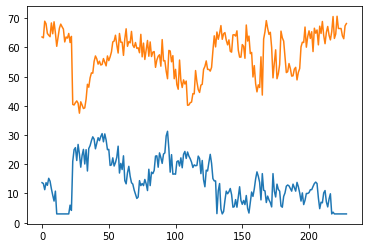

In [125]:
plt.plot(rl)
plt.plot(smith)

In [179]:
p1 = RandomPlayer()
p1.record_history = 1
p2 = RandomPlayer()
p2.record_history = 1
data = record_game(5000, [p1,p2],'data/5000random')

Playing game# 0
Playing game# 100
Playing game# 200
Playing game# 300
Playing game# 400
Playing game# 500
Playing game# 600
Playing game# 700
Playing game# 800
Playing game# 900
Playing game# 1000
Playing game# 1100
Playing game# 1200
Playing game# 1300
Playing game# 1400
Playing game# 1500
Playing game# 1600
Playing game# 1700
Playing game# 1800
Playing game# 1900
Playing game# 2000
Playing game# 2100
Playing game# 2200
Playing game# 2300
Playing game# 2400
Playing game# 2500
Playing game# 2600
Playing game# 2700
Playing game# 2800
Playing game# 2900
Playing game# 3000
Playing game# 3100
Playing game# 3200
Playing game# 3300
Playing game# 3400
Playing game# 3500
Playing game# 3600
Playing game# 3700
Playing game# 3800
Playing game# 3900
Playing game# 4000
Playing game# 4100
Playing game# 4200
Playing game# 4300
Playing game# 4400
Playing game# 4500
Playing game# 4600
Playing game# 4700
Playing game# 4800
Playing game# 4900
Took 210.949 seconds


In [46]:
s,a,r,n = data
allact = np.identity(a.shape[1])

In [253]:
data = load_game_data('data/5000random')

In [254]:
dql = DQLagent(length=(data[0].shape[1]+data[1].shape[1]))

In [259]:
dql.add_data(data)
dql.target_iterations=5
dql.predic_iterations=5
dql.do_target_iteration()

start target model iteration 0
start target model iteration 1
start target model iteration 2
start target model iteration 3
start target model iteration 4


In [262]:
dql.add_data(data)
dql.target_iterations=5
dql.predic_iterations=5
dql.do_target_iteration()
dql.generate_data();

start target model iteration 0
start target model iteration 1
start target model iteration 2
start target model iteration 3
start target model iteration 4
Playing game# 0
Took 7.452 seconds
{<Player: RLPlayer>: 19, <Player: RandomPlayer>: 31}


In [183]:
for i in range(10):
    print(i)
    dql.mtrain=500
    dql.target_iterations=30
    dql.predic_iterations=100
    dql.do_target_iteration(data0)
    vf = lambda x: dql.model_predict.predict(x)
    p1 = RLPlayer(vf, 0)
    p2 = RandomPlayer()
    print(compare_bots([p1, p2],20))

0
start target model iteration 0
start target model iteration 1
start target model iteration 2
start target model iteration 3
start target model iteration 4
start target model iteration 5
start target model iteration 6
start target model iteration 7
start target model iteration 8
start target model iteration 9
start target model iteration 10
start target model iteration 11
start target model iteration 12
start target model iteration 13
start target model iteration 14
start target model iteration 15
start target model iteration 16
start target model iteration 17
start target model iteration 18
start target model iteration 19
start target model iteration 20
start target model iteration 21
start target model iteration 22
start target model iteration 23
start target model iteration 24
start target model iteration 25
start target model iteration 26
start target model iteration 27
start target model iteration 28
start target model iteration 29
Took 2.304 seconds
{<Player: RLPlayer>: 0, <Play

In [143]:
dql.mtrain = 1000
test = dql.draw_sample(data)
s,a,r,n = test
sa = np.concatenate([s,a],axis=1)

In [188]:
dql.model_predict.save_weights('./model/temp')


Consider using a TensorFlow optimizer from `tf.train`.



Consider using a TensorFlow optimizer from `tf.train`.


In [189]:
dql.model_predict.load_weights('./model/temp')

In [169]:
dql.model_predict.predict(sa) 

array([[  5.973842 ],
       [ 48.460007 ],
       [  6.8140507],
       [  9.323796 ],
       [  7.277007 ],
       [130.62773  ],
       [103.64347  ],
       [  7.6318674],
       [  6.827512 ],
       [  5.3099623],
       [  5.4069285],
       [  6.937272 ],
       [  6.672025 ],
       [  7.8606734],
       [273.53214  ],
       [  6.49632  ],
       [ 12.074041 ],
       [  6.481762 ],
       [  8.749875 ],
       [135.3217   ],
       [ 29.89573  ],
       [145.61523  ],
       [ 41.399887 ],
       [  5.0051193],
       [  7.9146366],
       [ 47.905556 ],
       [  7.6721945],
       [  8.807971 ],
       [  9.736318 ],
       [  9.315252 ],
       [338.11377  ],
       [  6.0134463],
       [ 70.035706 ],
       [  4.756662 ],
       [ 13.499564 ],
       [  7.130609 ],
       [  7.1593513],
       [ 15.916928 ],
       [  6.3621407],
       [  7.491189 ],
       [  8.1720915],
       [  7.7814016],
       [ 25.938786 ],
       [ 12.397821 ],
       [  9.231531 ],
       [  

In [148]:
dql.model_target.predict(sa) 

array([[ 44.25826  ],
       [ 56.362705 ],
       [ 31.635338 ],
       [ 33.028034 ],
       [ 25.579624 ],
       [ 48.044487 ],
       [-17.43165  ],
       [ 27.873678 ],
       [ 30.801235 ],
       [ 35.30589  ],
       [ 41.902832 ],
       [ 29.43296  ],
       [ 30.419739 ],
       [ 24.380863 ],
       [257.27057  ],
       [ 39.950066 ],
       [ 40.042572 ],
       [ 36.83612  ],
       [ 37.632885 ],
       [ 68.435005 ],
       [ 40.60194  ],
       [ 76.118484 ],
       [ 43.577736 ],
       [ 40.18558  ],
       [ 25.172548 ],
       [ 53.431644 ],
       [ 29.72214  ],
       [ 25.060017 ],
       [ 29.724728 ],
       [ 45.989426 ],
       [340.67664  ],
       [ 34.193428 ],
       [ 43.32557  ],
       [ 40.560047 ],
       [ 53.594868 ],
       [ 22.875898 ],
       [ 39.2794   ],
       [ 48.19452  ],
       [ 34.838688 ],
       [ 24.993053 ],
       [ 24.71975  ],
       [ 24.628435 ],
       [ 49.593452 ],
       [ 50.020653 ],
       [ 33.942665 ],
       [ 3

In [170]:
dql.compute_target(test)

array([[  5.53444195],
       [ 48.87781906],
       [  7.13334751],
       [  9.91459751],
       [  7.46663666],
       [147.72640991],
       [107.94689941],
       [  7.57378721],
       [  6.95587254],
       [  5.27851868],
       [  5.51832342],
       [  7.18540144],
       [  6.8620162 ],
       [  7.67574692],
       [267.83364868],
       [  6.02640247],
       [ 11.8176527 ],
       [  6.49273825],
       [  9.76023245],
       [137.07067871],
       [ 34.79987335],
       [141.56114197],
       [ 47.82834244],
       [  4.56317472],
       [  7.8177371 ],
       [ 45.08970261],
       [  7.30554581],
       [  8.75451899],
       [ 10.31446171],
       [ 10.67348862],
       [292.956604  ],
       [  6.54566336],
       [ 74.5426712 ],
       [  4.99453306],
       [ 15.05854702],
       [  7.0985527 ],
       [  7.45872593],
       [ 15.92346096],
       [  6.75456333],
       [  7.38522863],
       [  7.92776728],
       [  7.80476713],
       [ 25.32969284],
       [ 11

In [197]:
p1 = SmithyBot()
p1.record_history = 1
p2 = RandomPlayer()
p2.record_history = 1
test = run([p1, p2])

In [198]:
test

[(<Player: RandomPlayer>, 17), (<Player: SmithyBot(3, 6, 8)>, 60)]

In [205]:
test = {'a':1,'b':2}
for i,j in test.items():
    print(i)
    print(j)

a
1
b
2


In [194]:
for i in range(10):
    print(i)
    dql.mtrain=500
    dql.target_iterations=30
    dql.predic_iterations=100
    dql.do_target_iteration(data0)
    vf = lambda x: dql.model_predict.predict(x)
    p1 = RLPlayer(vf, 0)
    p2 = RandomPlayer()
    print(compare_bots([p1, p2],20))

0
start target model iteration 0
start target model iteration 1
start target model iteration 2
start target model iteration 3
start target model iteration 4
start target model iteration 5
start target model iteration 6
start target model iteration 7
start target model iteration 8
start target model iteration 9
start target model iteration 10
start target model iteration 11
start target model iteration 12
start target model iteration 13
start target model iteration 14
start target model iteration 15
start target model iteration 16
start target model iteration 17
start target model iteration 18
start target model iteration 19
start target model iteration 20
start target model iteration 21
start target model iteration 22
start target model iteration 23
start target model iteration 24
start target model iteration 25
start target model iteration 26
start target model iteration 27
start target model iteration 28
start target model iteration 29
Took 3.082 seconds
{<Player: RLPlayer>: 0, <Play

KeyboardInterrupt: 

In [28]:
data

(array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        ...,
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]), array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        ...,
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3],
        [0, 0, 7, ..., 0, 0, 3]]))

In [25]:
vf = lambda x: 0
p1 = RandomPlayer()
vf = lambda x: dql.model_predict.predict(x)
p2 = RLPlayer(vf)
compare_bots([p1, p2], 10)

{<Player: RandomPlayer>: 10, <Player: RLPlayer>: 0}

In [19]:
sa[0,:].shape

(129,)

In [27]:
s,a,r,n = data
sa = np.concatenate([s,a],axis=1)
dql.model_predict(sa[0,:].reshape([1,-1]))[0]

<tf.Tensor: id=14012, shape=(1,), dtype=float32, numpy=array([0.9918932], dtype=float32)>

In [8]:
vf = lambda x: 0
p1 = RLPlayer(vf)
p1.record_history = 1
p2 = RLPlayer(vf)
p2.record_history = 1
data = record_game(1, [p1,p2])


Playing game# 0
Took 0.784 seconds


In [206]:
model_predict = tf.keras.models.Sequential([
  tf.keras.layers.Dense(129, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(129, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_predict.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])
model_target = model_predict

In [234]:
def compute_target(model, n, r):
    """
    compute_target use the target network to predict the Q value
    n is the next state
    with a Q(s,a) model
    compute r + gamma*max_a' Q(s',a')
    It outputs the target that the deep neural network wants to fit for.
    shape of action is 18
    """
    allact = np.identity(18)
    # array of (18, number of samples, state action pair)
    tmp = np.array([model.predict(np.concatenate([n, np.tile(act, [n.shape[0],1])],axis=1)) for act in allact])
    # maximum q(s',a')
    qn = np.max(tmp, axis=0)
    return qn + r.reshape([-1,1])

In [237]:
def fit_target(model_predict, model_target, data, epochs):
    """
    fit_target_network
    computes the target network prediction and fit for it with prediction network
    """
    # state, action, reward, next state
    s,a,r,n = data
    sa = np.concatenate([s,a],axis=1)
    target = compute_target(model_target, n,r)
    model_predict.fit(sa, target, epochs=epochs, verbose = 0)
    return model_predict

In [238]:
def draw_sample(data, mtrain=500):
    """
    draw random samples from the full dataset generated
    """
    m = data[1].shape[0]
    select = np.random.choice(m,mtrain,replace=False)
    return tuple([d[select,:] for d in data])
    

In [ ]:
def do_target_iteration(model_predict, model_target, data, epochs, target_iterations, ):
    

In [233]:
target_iterations = 10
predict_iterations = 10
for j in range(target_iterations):
    print('start target model iteration {:d}'.format(j))
    model_target = model_predict
    for i in range(predict_iterations):
        model_predict = fit_target_network(model_predict, model_target, draw_sample(data), 10)

start target model iteration 0
Train on 500 samples
Epoch 1/10
500/500 [==============================] - 0s 71us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 2/10
500/500 [==============================] - 0s 60us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 3/10
500/500 [==============================] - 0s 67us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 4/10
500/500 [==============================] - 0s 69us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 5/10
500/500 [==============================] - 0s 66us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 6/10
500/500 [==============================] - 0s 66us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 7/10
500/500 [==============================] - 0s 65us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 8/10
500/500 [==============================] - 0s 66us/sample - loss: 81.3340 - mean_squared_error: 81.3340
Epoch 9/10
500/500 [========

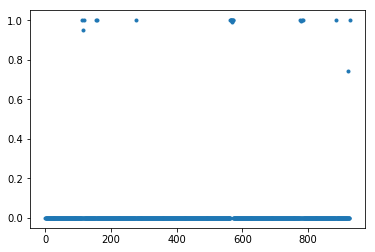

In [ ]:
def actor_critic(iterations=10, epochs=50, games=10):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(111, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(111, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(30, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    for i in range(iterations):
        print("----------------------------")
        print("|    Iteration #%03d        |" % (i + 1))
        print("----------------------------")
        p1 = rl_agent.RandomPlayer()
        vf = lambda x: model.predict(x).flatten()[0]
        p2 = rl_agent.RLPlayer(vf)
        X, Y = dominion.record_game(games, [p1,p2])
        model.fit(X, Y, epochs=epochs)
        print(dominion.compare_bots([p1, p2], 10))
    return model

# run games of random bot vs. smithy bot

In [25]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = smithyComboBotFactory()
    vf = lambda x: 0
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

55.9562759399


'winrate of chapel bot over smithy bot is 0.0 %'

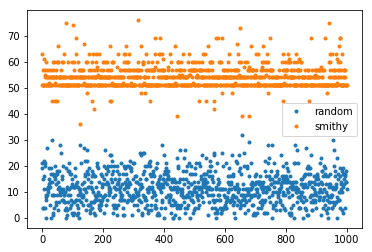

In [27]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','smithy'])
'winrate of chapel bot over smithy bot is {:.01f} %'.format(sum(rl-smithy>0)*100./len(rl))

# games of smithy vs. chapel bot

In [30]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = smithyComboBotFactory()
    p2 = chapelComboBot
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

15.8718259335


'winrate of chapel bot over smithy bot is 25.2 %'

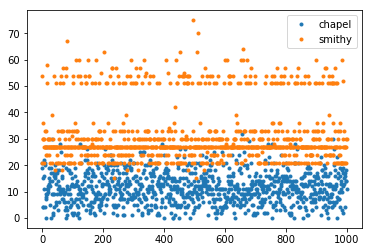

In [31]:
chapel=[]
smithy=[]
for s_this in s:
    if s_this[0][0].name == 'chapelComboBot':
        chapel.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        chapel.append(s_this[1][1])
        smithy.append(s_this[0][1])

chapel = np.array(chapel)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['chapel','smithy'])
'winrate of chapel bot over smithy bot is {:.01f} %'.format(sum(chapel-smithy>0)/1000.*100)

## random vs. chapel bot

In [33]:
st = time.time()
s = []
for i in xrange(100):
    p1 = chapelComboBot
    vf = lambda x: 0
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st

8.80713677406


'winrate of random bot over chapel bot is 1.2 %'

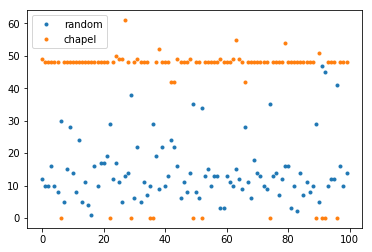

In [34]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','chapel'])
'winrate of random bot over chapel bot is {:.01f} %'.format(sum(rl-smithy>0)/1000.*100)

## run a test game

In [16]:
p1=smithyComboBotFactory()
p1.name = '1'
p2=smithyComboBotFactory()
g = Game.setup([p1, p2])

In [17]:
while not g.over():
    g = g.take_turn()

In [18]:
g.playerstates[0].player.name

'1'

In [77]:
p1=smithyComboBotFactory()
p2=smithyComboBotFactory()
s = run([p1, p2])

In [78]:
scores_to_data(s)

(array([[0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        ...,
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0],
        [0, 8, 8, ..., 0, 0, 0]]),
 array([15, 16, 17, 18, 19, 21, 23, 18, 19, 21, 23, 25, 21, 23, 18, 19, 20,
        15, 16,  3,  4,  5,  6,  7,  8,  9, 10,  5,  6,  0,  0,  0,  0, -1,
        -2, -3, -4]))

# use simple fitting algorithm for value function

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [14]:
p1 = smithyComboBotFactory()
p2 = smithyComboBotFactory()
[X,Y] = record_game(100,[p1,p2],[True, False])

Playing game# 0
Took 1.049 seconds


In [71]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300)
reg_this.fit(X, Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=None)

In [72]:
np.std(Y)

7.462169848909707

In [75]:
np.std(reg_this.predict(X))

2.9179620901036536

In [76]:
np.std(reg_this.predict(X)-Y)

6.714506674024179

In [64]:
nepoch = 50
Xlist=[]
Ylist=[]
reglist=[]
reg_this = regr_2
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    Xlist.append(xtmp)
    Ylist.append(ytmp)
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    reg_this.fit(xtmp, ytmp)
    reglist.append(reg_this)

epoch number 0
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 48.654 seconds
epoch number 1
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 46.211 seconds
epoch number 2
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 47.198 seconds
epoch number 3
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 95.950 seconds
epoch number 4
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 134.172 seconds
epoch number 5
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 69.596 seconds
epoch number 6
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 82.834 seconds
epoch number 7
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 103.316 seconds
epoch number 8
Playing game# 0
Playing game# 1

KeyboardInterrupt: 

In [69]:
np.concatenate(Xlist).shape

(524447, 111)

In [70]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(np.concatenate(Xlist), np.concatenate(Ylist))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [71]:
st = time.time()
s = []
for i in xrange(50):
    if not i%10:
        print('game {:d}'.format(i))
    p1 = rl_agent.RLPlayer(lambda x: 0)
    p1.name = 'randombot'
    vf = lambda x: reg_this.predict(x)[0]
    p2 = rl_agent.RLPlayer(vf)
    s_this = dominion.run([p1,p2])
    s.append(s_this)
print time.time() - st

game 0
game 10
game 20
game 30
game 40
44.5003659725


In [72]:
rl=[]
ran=[]
for s_this in s:
    if s_this[0][0].name == 'randombot':
        ran.append(s_this[0][1])
        rl.append(s_this[1][1])
    else:
        ran.append(s_this[1][1])
        rl.append(s_this[0][1])

rl = np.array(rl)
ran = np.array(ran)

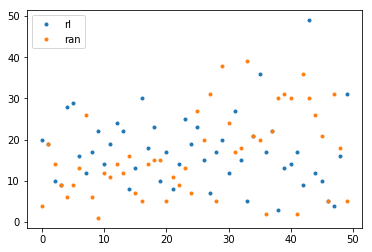

In [73]:
plt.plot(rl,'.')
plt.plot(ran,'.')
plt.legend(['rl','ran'])

In [74]:
'winrate of rl bot over random bot is {:.01f} %'.format(sum(rl-ran>0)/float(len(rl))*100)

'winrate of rl bot over random bot is 50.0 %'

In [55]:
nepoch = 10
thresh = 100000
X=np.concatenate(Xlist)
Y=np.concatenate(Ylist)
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(np.concatenate(Xlist), np.concatenate(Ylist))
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    X = np.concatenate([X, xtmp])
    Y = np.concatenate([Y, ytmp])
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    if len(Y)>thresh:
        reg_this.fit(X[-thresh:,:], Y[-thresh:])
    else:
        reg_this.fit(X, Y)
    reglist.append(reg_this)

epoch number 0
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 107.413 seconds
epoch number 1
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 100.908 seconds
epoch number 2
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 119.176 seconds
epoch number 3
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 111.700 seconds
epoch number 4
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 51.191 seconds
epoch number 5
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 105.833 seconds
epoch number 6
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 82.883 seconds
epoch number 7
Playing game# 0
Playing game# 10
Playing game# 20
Playing game# 30
Playing game# 40
Took 88.979 seconds
epoch number 8
Playing game# 0
Playing game

### evaluate winrate against random bot

In [58]:
reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
reg_this.fit(X, Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [23]:
st = time.time()
s = []
for i in xrange(50):
    if not i%10:
        print('game {:d}'.format(i))
    p1 = RLPlayer(lambda x: 0)
    p1.name = 'randombot'
    vf = lambda x: regr_2.predict(x)[0]
    p2 = RLPlayer(vf)
    s_this = run([p1,p2])
    s.append(s_this)
print time.time() - st
rl=[]
ran=[]
for s_this in s:
    if s_this[0][0].name == 'randombot':
        ran.append(s_this[0][1])
        rl.append(s_this[1][1])
    else:
        ran.append(s_this[1][1])
        rl.append(s_this[0][1])
rl = np.array(rl)
ran = np.array(ran)
print('winrate of rl bot over random bot is {:.01f} %'.format(sum(rl-ran>0)/float(len(rl))*100))

game 0
game 10
game 20
game 30
game 40
40.3798801899
winrate of rl bot over random bot is 24.0 %


In [ ]:
nepoch = 10
thresh = 100000
reglist=[]
for i in range(nepoch):
    print('epoch number {:d}'.format(i))
    [xtmp, ytmp] = dominion.record_game(50, lambda x: reg_this.predict(x)[0])
    X = np.concatenate([X, xtmp])
    Y = np.concatenate([Y, ytmp])
    reg_this = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    if len(Y)>thresh:
        reg_this.fit(X[-thresh:,:], Y[-thresh])
    else:
        reg_this.fit(X[-thresh:,:], Y[-thresh])
    reglist.append(reg_this)